
# Data Storytelling: U.S. Civilian Deaths Abroad Since 2002

## Introduction
This notebook explores a dataset from the US state department detailing the deaths of U.S. civilians abroad from 2002 onwards. The data includes the date, location, and cause of death. The objective is to uncover trends, correlations, and insights that arise from this dataset. The questions we seek to answer are as follows: what is the most common cause of death for Americans traveling abroad? what events corresponded with the greatest loss of life? which country is the most dangerous for tourists?

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('US_CIVILIAN_DEATHS_ABROAD_SINCE_2002.csv')
data.head()
    

,Date,City/Region,Country,Cause of Death
0,10/25/2003,Shkin,Afghanistan,Terrorist Action
1,10/25/2003,Shkin,Afghanistan,Terrorist Action
2,08/29/2004,Kabul,Afghanistan,Terrorist Action
3,08/29/2004,Kabul,Afghanistan,Terrorist Action
4,08/29/2004,Kabul,Afghanistan,Terrorist Action


## Data Exploration
Let's start by exploring the dataset to understand its structure and clean it if necessary. The countries were added to the original dataset as the location column is spotty and requires a great deal of cleaning and organization.


In [43]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            15549 non-null  object
 1   City/Region     15541 non-null  object
 2   Country         15549 non-null  object
 3   Cause of Death  15549 non-null  object
dtypes: object(4)
memory usage: 486.0+ KB



## Data Cleaning
We'll convert the 'Date' column to datetime format and handle any missing values.
    

In [44]:
# Convert 'Date' to datetime and fill missing values if any
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.fillna('Unknown', inplace=True)

## Data Analysis
We'll perform various analyses to explore the dataset more deeply.

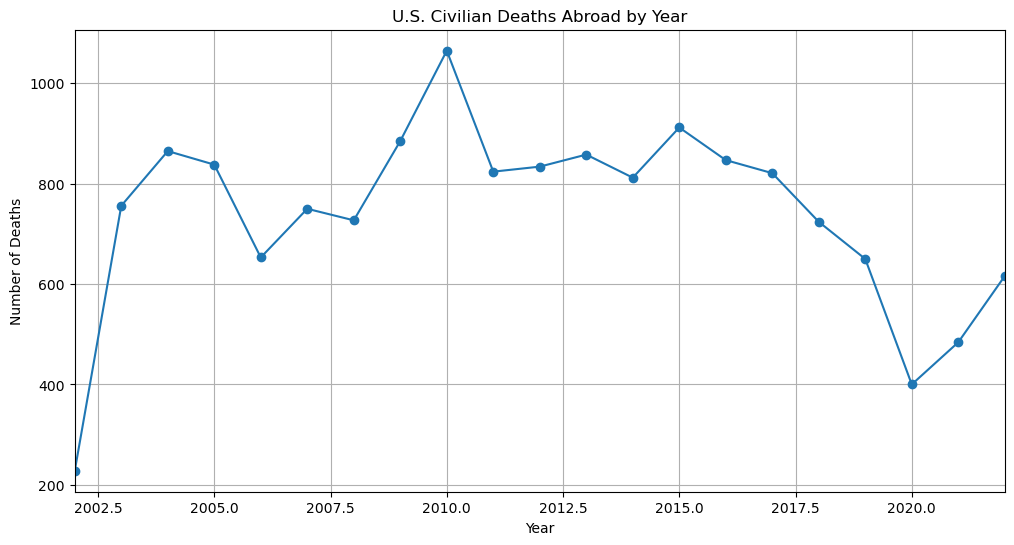

In [45]:
# Count deaths by year
data['Year'] = data['Date'].dt.year
deaths_by_year = data['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(deaths_by_year.index, deaths_by_year.values, marker='o')
plt.title('U.S. Civilian Deaths Abroad by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xlim(2002,2022)
plt.grid(True)
plt.show()

From the chart above some interesting trends become apparent. 2020 and 2021 having the lowest total of the bunch (only the last few months of 2002 and the first few months of 2022 are included in the dataset) makes sense in light of the significantly reduced number of travelers during the COVID-19 pandemic. It would be interesting to compare the number of deaths and the number of total travelers and compare it to other parts of this dataset to see if all-cause mortality remained the same or even increased per traveler during the uncertainty of the pandemic. Additionally, 2010 being the deadliest year makes sense in light of something we will touch on later on in this analysis.

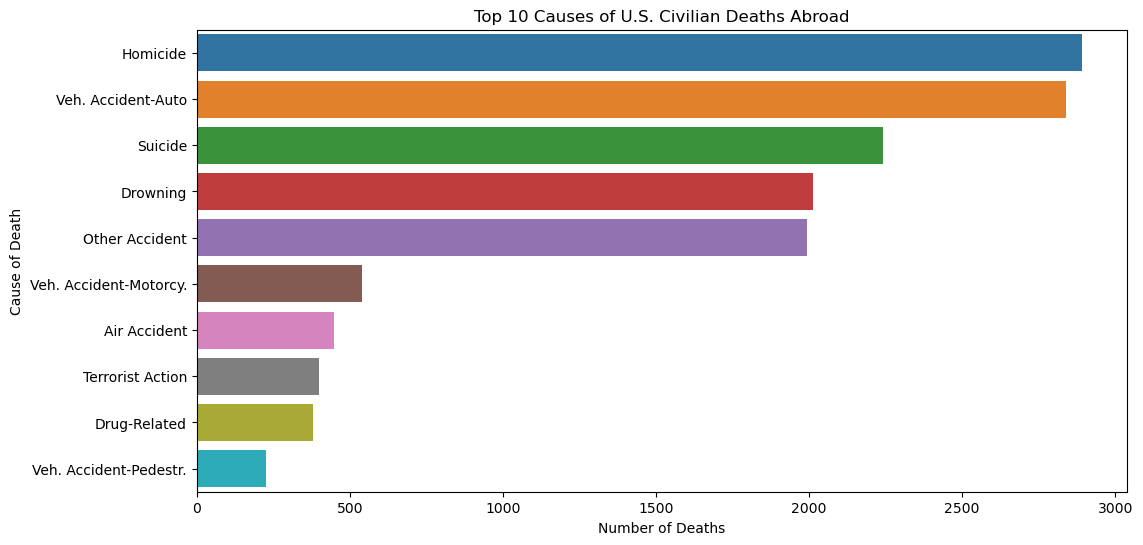

In [46]:
# Count deaths by cause
cause_counts = data['Cause of Death'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_counts.values, y=cause_counts.index)
plt.title('Top 10 Causes of U.S. Civilian Deaths Abroad')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.show()

From the plot above it is interesting to note that although Homicide is the largest category from the dataset, as seen above, vehicle accidents of all types account for a larger portion of the total deaths when they are combined. 

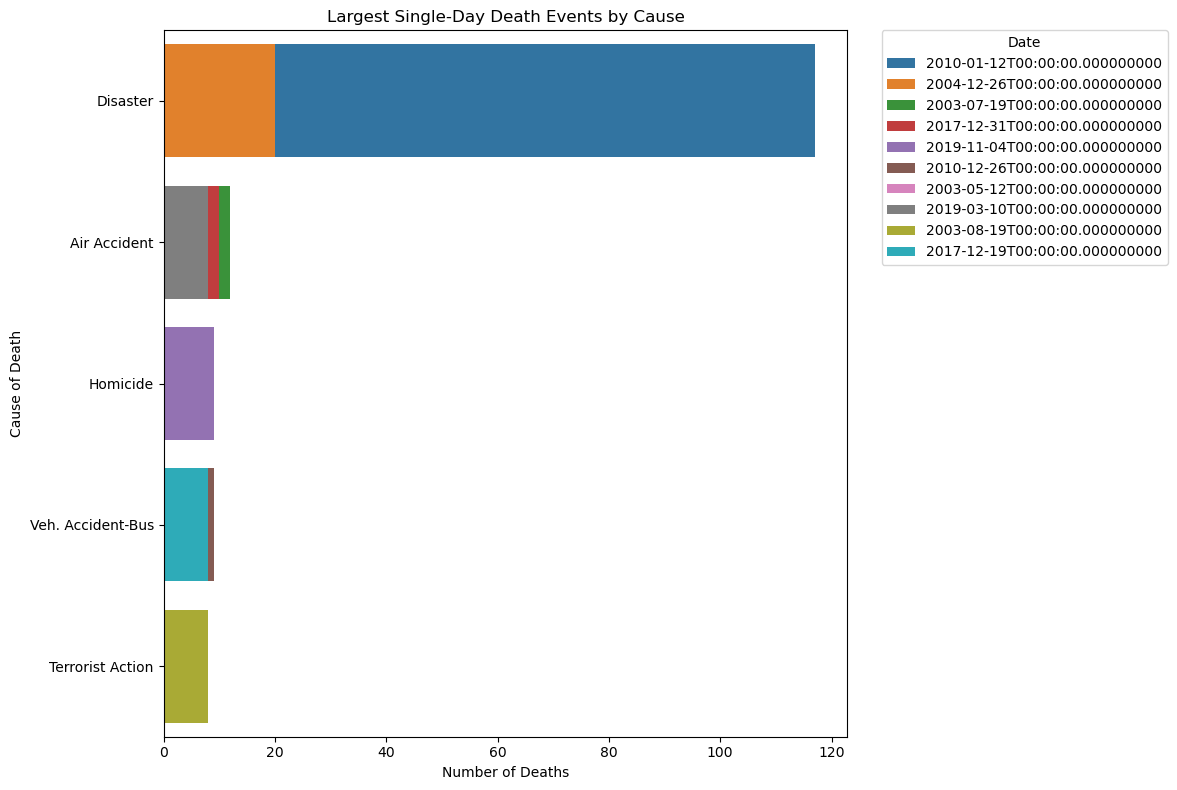

In [47]:
# Identify the largest single-day events with multiple deaths having the same cause
grouped_data = data.groupby(['Date', 'Cause of Death']).size().reset_index(name='Count')
largest_events = grouped_data[grouped_data['Count'] > 1].sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Cause of Death', hue='Date', data=largest_events, dodge=False)
plt.title('Largest Single-Day Death Events by Cause')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

The above graph captures the most deadly single incidents which contribute to death tolls disproportionally. The single largest of these was due to the devestating 2010 earthquake in Haiti, contributing nearly 100 deaths to the 2010 total. The second largest of these was due to the horrific 2004 Indian Ocean Tsunami. Other notable incidents include an attack by a Mexican drug cartel on the the LeBaron and Langford families en route to a wedding in November of 2019, the crash of Ethiopian Airlines Flight 302 due to failures in the Boeing 737 Max's MCAS system in 2019, and the 2003 Canal Hotel bombing in Baghdad, Iraq.

Clearly, these data shine a light on much larger world problems from lapses in saftey from one of the largest corporations in the world, to mistaken identity and narcoterrorism , to the 2003 invasion of Iraq and its aftermath. 

C:\Users\Quinn\AppData\Local\Temp\ipykernel_31268\2405025414.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ValueError: aspect must be finite and positive 

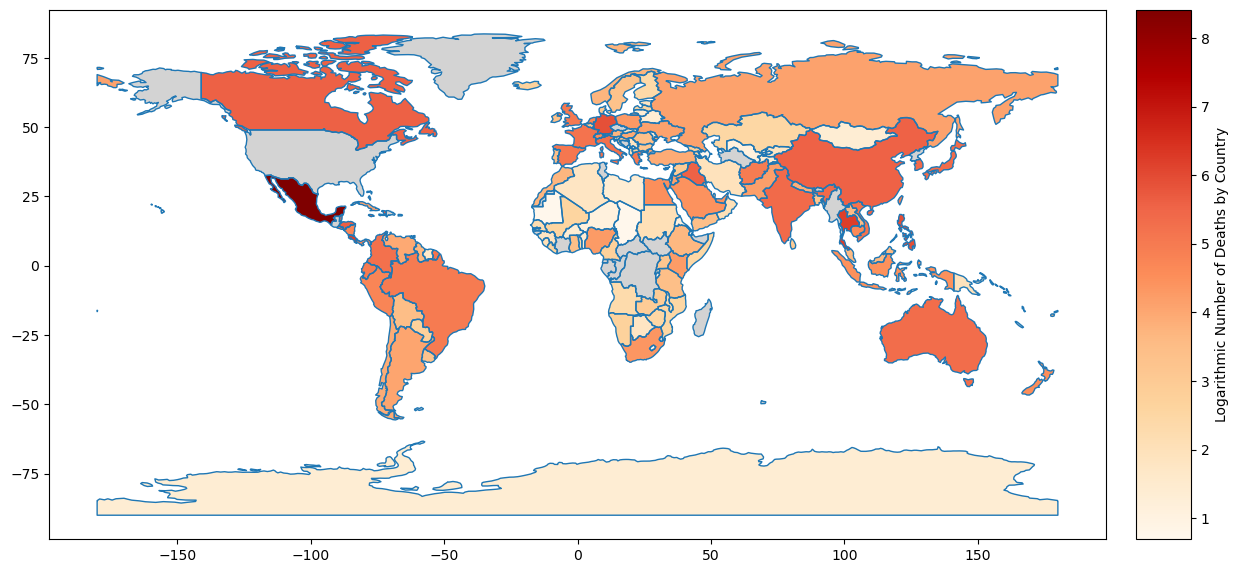

In [48]:

# Generate a heatmap visualization of deaths by country with logarithmic scale
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Load world shape map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge death data with world map
country_deaths = data['Country'].value_counts().reset_index()
country_deaths.columns = ['name', 'Deaths']
world = world.merge(country_deaths, on='name', how='left')

# Adjusting color for United States
world['is_us'] = world['name'] == 'United States'
world['Deaths_log'] = np.log1p(world['Deaths'])

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Deaths_log', ax=ax, legend=True, cax=cax, 
           legend_kwds={'label': "Logarithmic Number of Deaths by Country"},
           cmap='OrRd', missing_kwds={'color': 'lightgrey'},
           categorical=False)
world[world['is_us']].plot(ax=ax, color='blue', legend=True)
plt.title('Heatmap of U.S. Civilian Deaths by Country (Log Scale)')
plt.show()


It is important to note that these data will skew heavily towards the most traveled countries and that the number of deaths is not necesarily indicitave of how safe or unsafe any particular country may be. Many of these deaths are associated with particular calamities or individual situations that do not generalize to an entire country or its inhabitants. With that being said, the above plot shows a heatmap of deaths by country. It is plotted on a logrithmic scale for better visibility. As mentioned before this likely is a better measure of the countries which Americans more frequently visit, particularly Mexico, which had the most deaths in the dataset.

## Conclusion
This analysis provides insights into the trends and patterns in U.S. civilian deaths abroad. Further investigation could involve deeper statistical analysis and hypothesis testing regarding specific causes or regions.